## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:703: UserWarning: You are logged on as jil386_UCSDOnline with an administrator role, proceed with caution.
  warnings.warn(


#### Now you are ready to start!

In [2]:
from arcgis.features import FeatureLayer, FeatureLayerCollection, FeatureSet

# Item Added From Toolbar
# Title: MTS Trolley Stop | Type: Feature Service | Owner: jil386_UCSDOnline
item = gis.content.get("6a1072605d8b41d38de73ffc0ff2ae92")
item

<Item title:"MTS Trolley Stop" type:Feature Layer Collection owner:jil386_UCSDOnline>

In [3]:
feature_layer = item.layers[0]
query_result_1 = feature_layer.query(where="location_type = 1")
query_result_0 = feature_layer.query(where="location_type = 0")
len(query_result_1.features), len(query_result_0.features)

(102, 258)

### Create Trolley Stop Buffer for different MileRange
Use diffuse

In [65]:
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.geometry import buffer, Geometry

# # Item Added From Toolbar
# # Title: MTS Trolley Stop Buffer | Type: Feature Service | Owner: jil386_UCSDOnline
# buffer_geometry = gis.content.get("2cfefebe0a9b4d09bec9e04b8f195be8").layers[0]
# Item Added From Toolbar
# Title: MTS Trolley Stop Buffer of Multiple | Type: Feature Service | Owner: jil386_UCSDOnline
buffer_geometry = gis.content.get("f5295568cc3041bbaf7d4065aaa773eb").layers[0]
# Item Added From Toolbar
# Title: SanGIS Census BlockGroups | Type: Feature Service | Owner: jil386_UCSDOnline
feature_layer = gis.content.get("7614b8beb6d04e5789701f337d3348ef").layers[0]
buffer_geometry, feature_layer

(<FeatureLayer url:"https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/MTS Trolley Stop Buffer of Multiple/FeatureServer/0">,
 <FeatureLayer url:"https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/SanGIS_Census_BlockGroups/FeatureServer/0">)

In [67]:
def get_buffer_mile_list(trolley_buffers, census_blockgroups, distance):
    # Query for features intersecting the buffer
    buffer_mile = trolley_buffers.query(where='BUFF_DIST = {}'.format(distance))
    query_result = census_blockgroups.query(geometry_filter=arcgis.geometry.filters.intersects(buffer_mile.features[0].geometry), out_fields="FID")
    buffer_mile_list = [i.attributes["FID"] for i in query_result.features]
    print(len(buffer_mile_list))
    return buffer_mile_list

In [71]:
# distances = ['0.5', '1', '1.5', '2', '2.5']
distances = [0.5, 1, 1.5, 2, 2.5]
buffer_mile_list_dict = dict()
for dist in distances:
    buffer_mile_list_dict[dist] = get_buffer_mile_list(buffer_geometry, feature_layer, dist)
# # Query for features intersecting the buffer
# buffer_1mile = buffer_geometry.query(where='BUFF_DIST = 1')
# query_result = feature_layer.query(geometry_filter=arcgis.geometry.filters.intersects(buffer_1mile.features[0].geometry), out_fields="FID")
# buffer_1mile_list = [i.attributes["FID"] for i in query_result.features]
# query_result

381
647
877
1040
1158


### Updating BlockGroups

In [78]:
# Item Added From Toolbar
# Title: BlockGroups with Buffer | Type: Feature Service | Owner: jil386_UCSDOnline
block_buffer = gis.content.get("4a172955dd3141e08e6cc597add25ffb").layers[0]

In [81]:
features_to_update = []

for feature in block_buffer.query().features:
    # Simplified check for intersection - in practice, use a spatial query
    feature.attributes["MileRange"] = 10
    for dist in distances:
        if feature.attributes["FID"] in buffer_mile_list_dict[dist]:
            feature.attributes['MileRange'] = dist
            break
#     if feature.attributes["FID"] in buffer_25mile_list:
#         feature.attributes['MileRange'] = 2.5
#     elif feature.attributes["FID"] in buffer_1mile_list:
#         feature.attributes['MileRange'] = 1
#     else:
#         feature.attributes['MileRange'] = 0
    
    features_to_update.append(feature)

# Now, update the layer with the modified features
update_result = block_buffer.edit_features(updates=features_to_update)
print(update_result)

{'addResults': [], 'updateResults': [{'objectId': 1, 'uniqueId': 1, 'globalId': None, 'success': True}, {'objectId': 2, 'uniqueId': 2, 'globalId': None, 'success': True}, {'objectId': 3, 'uniqueId': 3, 'globalId': None, 'success': True}, {'objectId': 4, 'uniqueId': 4, 'globalId': None, 'success': True}, {'objectId': 5, 'uniqueId': 5, 'globalId': None, 'success': True}, {'objectId': 6, 'uniqueId': 6, 'globalId': None, 'success': True}, {'objectId': 7, 'uniqueId': 7, 'globalId': None, 'success': True}, {'objectId': 8, 'uniqueId': 8, 'globalId': None, 'success': True}, {'objectId': 9, 'uniqueId': 9, 'globalId': None, 'success': True}, {'objectId': 10, 'uniqueId': 10, 'globalId': None, 'success': True}, {'objectId': 11, 'uniqueId': 11, 'globalId': None, 'success': True}, {'objectId': 12, 'uniqueId': 12, 'globalId': None, 'success': True}, {'objectId': 13, 'uniqueId': 13, 'globalId': None, 'success': True}, {'objectId': 14, 'uniqueId': 14, 'globalId': None, 'success': True}, {'objectId': 15

### Merge Poverty Map into BlockGroups

<Item title:"Poverty Status in the Past 12 Months of People in Housing Units" type:Table Layer owner:jil386_UCSDOnline>
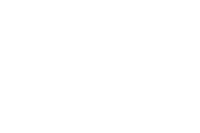

In [28]:
import pandas as pd
# Item Added From Toolbar
# Title: BlockGroups with Buffer | Type: Feature Service | Owner: jil386_UCSDOnline
block_buffer = gis.content.get("4a172955dd3141e08e6cc597add25ffb").layers[0]
# Item Added From Toolbar
# Title: Poverty Status in the Past 12 Months of People in Housing Units | Type: Feature Service | Owner: jil386_UCSDOnline
poverty_table_item = gis.content.get("fc357cfb75af4d97b27e4a0b27bee457")
poverty_table = poverty_table_item.tables[0]
poverty_table_item

In [24]:
poverty_data = poverty_table.query().sdf  # 'sdf' is a Spatial DataFrame, similar to a Pandas DataFrame but with spatial capabilities
print(poverty_data.head())  # Print the first few records

                  GEO_ID                                               NAME  \
0  1500000US060730001001  Block Group 1; Census Tract 1; San Diego Count...   
1  1500000US060730001002  Block Group 2; Census Tract 1; San Diego Count...   
2  1500000US060730002011  Block Group 1; Census Tract 2.01; San Diego Co...   
3  1500000US060730002012  Block Group 2; Census Tract 2.01; San Diego Co...   
4  1500000US060730002021  Block Group 1; Census Tract 2.02; San Diego Co...   

   B17101_001E  B17101_001M  B17101_002E  B17101_002M  B17101_003E  \
0         1298          304           33           41         1265   
1         1729          338           22           35         1707   
2          968          339           31           36          937   
3         1326          202          161          124         1165   
4         1026          280           23           39         1003   

   B17101_003M  ObjectId  
0          314         1  
1          338         2  
2          322         

In [26]:
def convert_geo_id_to_ctblockgro(geo_id):
    # Example conversion logic
    converted_value = geo_id[-7:]  # This is a placeholder, adjust the logic as needed
    return int(converted_value)
poverty_data['Converted_GEO_ID'] = poverty_data['GEO_ID'].apply(convert_geo_id_to_ctblockgro)
print(poverty_data.head())  # Print the first few records

                  GEO_ID                                               NAME  \
0  1500000US060730001001  Block Group 1; Census Tract 1; San Diego Count...   
1  1500000US060730001002  Block Group 2; Census Tract 1; San Diego Count...   
2  1500000US060730002011  Block Group 1; Census Tract 2.01; San Diego Co...   
3  1500000US060730002012  Block Group 2; Census Tract 2.01; San Diego Co...   
4  1500000US060730002021  Block Group 1; Census Tract 2.02; San Diego Co...   

   B17101_001E  B17101_001M  B17101_002E  B17101_002M  B17101_003E  \
0         1298          304           33           41         1265   
1         1729          338           22           35         1707   
2          968          339           31           36          937   
3         1326          202          161          124         1165   
4         1026          280           23           39         1003   

   B17101_003M  ObjectId  Converted_GEO_ID  
0          314         1              1001  
1          338

In [36]:
block_data = block_buffer.query().sdf
block_data.drop(columns=['GEO_ID', 'B17101_001E', 'B17101_001M', 'B17101_002E', 'B17101_002M', 'B17101_003E', 'B17101_003M'], inplace=True, errors='ignore')
# Merge based on the converted GEO_ID and CTBLOCKGRO
merged_data = pd.merge(left=block_data, right=poverty_data, left_on='CTBLOCKGRO', right_on='Converted_GEO_ID', how='left')
block_data.shape, poverty_data.shape, merged_data.shape

((2057, 10), (2058, 10), (2057, 20))

In [37]:
merged_data.drop(columns=['Converted_GEO_ID', 'ObjectId'], inplace=True, errors='ignore')
print(merged_data.head())  # Print the first few records

   FID  CTBLOCKGRO  TRACT  BLOCKGROUP     Shape_STAr    Shape_STLe  \
0    1        1001    100           1    6612183.297   14926.27666   
1    2        1002    100           2  9493350.65981  17138.306391   
2    3        2011    201           1  4886043.57328  12687.454265   
3    4        2012    201           2  3851820.19274   8002.546044   
4    5        2021    202           1  4287464.86349  12084.228865   

      Shape__Area  Shape__Length  MileRange  \
0   870950.835938    5416.886362        1.0   
1  1250394.460938    6218.868332        1.0   
2   643591.308594    4605.049168        1.0   
3   507343.191406    2905.047841        1.0   
4   564610.605469    4384.826942        1.0   

                                               SHAPE                 GEO_ID  \
0  {"rings": [[[-13045373.0233012, 3863378.862094...  1500000US060730001001   
1  {"rings": [[[-13045284.5432958, 3863125.887768...  1500000US060730001002   
2  {"rings": [[[-13043262.6470301, 3863203.721765...  15000

In [59]:
from arcgis.features import Feature, FeatureSet

# Initialize an empty list to hold the features
features_to_update = []

# Iterate over the DataFrame rows
for index, row in merged_data.iterrows():
    # Create a Feature object for each row
    feature = Feature(
        geometry=row['SHAPE'],  # Assuming 'SHAPE' is a column with geometry information
        attributes=row.drop('SHAPE').to_dict()  # Exclude the 'SHAPE' column from attributes
    )
    features_to_update.append(feature)

# Create a FeatureSet from the list of features
feature_set = FeatureSet(features=features_to_update)
# Perform the update
update_result = block_buffer.edit_features(updates=feature_set.features)
update_result

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': True},
  {'objectId': 2, 'uniqueId': 2, 'globalId': None, 'success': True},
  {'objectId': 3, 'uniqueId': 3, 'globalId': None, 'success': True},
  {'objectId': 4, 'uniqueId': 4, 'globalId': None, 'success': True},
  {'objectId': 5, 'uniqueId': 5, 'globalId': None, 'success': True},
  {'objectId': 6, 'uniqueId': 6, 'globalId': None, 'success': True},
  {'objectId': 7, 'uniqueId': 7, 'globalId': None, 'success': True},
  {'objectId': 8, 'uniqueId': 8, 'globalId': None, 'success': True},
  {'objectId': 9, 'uniqueId': 9, 'globalId': None, 'success': True},
  {'objectId': 10, 'uniqueId': 10, 'globalId': None, 'success': True},
  {'objectId': 11, 'uniqueId': 11, 'globalId': None, 'success': True},
  {'objectId': 12, 'uniqueId': 12, 'globalId': None, 'success': True},
  {'objectId': 13, 'uniqueId': 13, 'globalId': None, 'success': True},
  {'objectId': 14, 'uniqueId': 14, 'globalId': Non

### Merge Senior Map into BlockGroups

<Item title:"Households by Presence of People 65 Years and Over Household Size and Household Type" type:Table Layer owner:jil386_UCSDOnline>
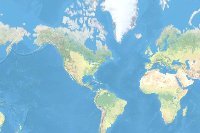

In [6]:
import pandas as pd
# Item Added From Toolbar
# Title: BlockGroups with Buffer | Type: Feature Service | Owner: jil386_UCSDOnline
block_buffer = gis.content.get("4a172955dd3141e08e6cc597add25ffb").layers[0]
# Item Added From Toolbar
# Title: Households by Presence of People 65 Years and Over Household Size and Household Type | Type: Feature Service | Owner: jil386_UCSDOnline
senior_table_item = gis.content.get("b159625ebb7745dbb1d807d7dd1b7da2")
senior_table = senior_table_item.tables[0]
senior_table_item

In [7]:
senior_data = senior_table.query().sdf  # 'sdf' is a Spatial DataFrame, similar to a Pandas DataFrame but with spatial capabilities
print(senior_data.head())  # Print the first few records
senior_data = senior_data[['GEO_ID', 'B11007_002E']]
print(senior_data.head())  # Print the first few records

                  GEO_ID                                               NAME  \
0  1500000US060730001001  Block Group 1; Census Tract 1; San Diego Count...   
1  1500000US060730001002  Block Group 2; Census Tract 1; San Diego Count...   
2  1500000US060730002011  Block Group 1; Census Tract 2.01; San Diego Co...   
3  1500000US060730002012  Block Group 2; Census Tract 2.01; San Diego Co...   
4  1500000US060730002021  Block Group 1; Census Tract 2.02; San Diego Co...   

   B11007_001E  B11007_001M  B11007_002E  B11007_002M  B11007_003E  \
0          510           79          238           90           41   
1          646          112          331           98           92   
2          414           98          117           46           70   
3          804          109          494          102          334   
4          680          186          182          110          149   

   B11007_003M  B11007_004E  B11007_004M  ...  B11007_007M  B11007_008E  \
0           26          197  

In [9]:
block_data = block_buffer.query().sdf
block_data.drop(columns=['B11007_002E'], inplace=True, errors='ignore')
# Merge based on the converted GEO_ID and CTBLOCKGRO
merged_data = pd.merge(left=block_data, right=senior_data, left_on='GEO_ID', right_on='GEO_ID', how='left')
block_data.shape, senior_data.shape, merged_data.shape

((2057, 17), (2058, 2), (2057, 18))

In [10]:
# merged_data.drop(columns=['ObjectId'], inplace=True, errors='ignore')
print(merged_data.head())  # Print the first few records

   FID  CTBLOCKGRO  TRACT  BLOCKGROUP     Shape_STAr    Shape_STLe  \
0    1        1001    100           1    6612183.297   14926.27666   
1    2        1002    100           2  9493350.65981  17138.306391   
2    3        2011    201           1  4886043.57328  12687.454265   
3    4        2012    201           2  3851820.19274   8002.546044   
4    5        2021    202           1  4287464.86349  12084.228865   

      Shape__Area  Shape__Length  MileRange                 GEO_ID  \
0   870950.835938    5416.886362        1.0  1500000US060730001001   
1  1250394.460938    6218.868332        0.5  1500000US060730001002   
2   643591.308594    4605.049168        1.0  1500000US060730002011   
3   507343.191406    2905.047841        1.0  1500000US060730002012   
4   564610.605469    4384.826942        0.5  1500000US060730002021   

   B17101_001E  B17101_001M  B17101_002E  B17101_002M  B17101_003E  \
0         1298          304           33           41         1265   
1         1729    

In [11]:
from arcgis.features import Feature, FeatureSet

# Initialize an empty list to hold the features
features_to_update = []

# Iterate over the DataFrame rows
for index, row in merged_data.iterrows():
    # Create a Feature object for each row
    feature = Feature(
        geometry=row['SHAPE'],  # Assuming 'SHAPE' is a column with geometry information
        attributes=row.drop('SHAPE').to_dict()  # Exclude the 'SHAPE' column from attributes
    )
    features_to_update.append(feature)

# Create a FeatureSet from the list of features
feature_set = FeatureSet(features=features_to_update)
# Perform the update
update_result = block_buffer.edit_features(updates=feature_set.features)
update_result

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': True},
  {'objectId': 2, 'uniqueId': 2, 'globalId': None, 'success': True},
  {'objectId': 3, 'uniqueId': 3, 'globalId': None, 'success': True},
  {'objectId': 4, 'uniqueId': 4, 'globalId': None, 'success': True},
  {'objectId': 5, 'uniqueId': 5, 'globalId': None, 'success': True},
  {'objectId': 6, 'uniqueId': 6, 'globalId': None, 'success': True},
  {'objectId': 7, 'uniqueId': 7, 'globalId': None, 'success': True},
  {'objectId': 8, 'uniqueId': 8, 'globalId': None, 'success': True},
  {'objectId': 9, 'uniqueId': 9, 'globalId': None, 'success': True},
  {'objectId': 10, 'uniqueId': 10, 'globalId': None, 'success': True},
  {'objectId': 11, 'uniqueId': 11, 'globalId': None, 'success': True},
  {'objectId': 12, 'uniqueId': 12, 'globalId': None, 'success': True},
  {'objectId': 13, 'uniqueId': 13, 'globalId': None, 'success': True},
  {'objectId': 14, 'uniqueId': 14, 'globalId': Non

### Merge Gross Rent Map into BlockGroups

<Item title:"Gross Rent as a Percentage of Household Income in the Past 12 Months" type:Table Layer owner:jil386_UCSDOnline>
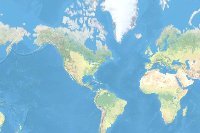

In [2]:
import pandas as pd
# Item Added From Toolbar
# Title: BlockGroups with Buffer | Type: Feature Service | Owner: jil386_UCSDOnline
block_buffer = gis.content.get("4a172955dd3141e08e6cc597add25ffb").layers[0]
# Item Added From Toolbar
# Title: Gross Rent as a Percentage of Household Income in the Past 12 Months | Type: Feature Service | Owner: jil386_UCSDOnline
grossrent_table_item = gis.content.get("1c878b9fc0654923b8ac4457c4361d60")
grossrent_table = grossrent_table_item.tables[0]
grossrent_table_item

In [3]:
grossrent_data = grossrent_table.query().sdf  # 'sdf' is a Spatial DataFrame, similar to a Pandas DataFrame but with spatial capabilities
print(grossrent_data.head())  # Print the first few records
grossrent_data = grossrent_data[['GEO_ID', 'B25070_010E']]
print(grossrent_data.head())  # Print the first few records

                  GEO_ID                                               NAME  \
0  1500000US060730047002  Block Group 2; Census Tract 47; San Diego Coun...   
1  1500000US060730048001  Block Group 1; Census Tract 48; San Diego Coun...   
2  1500000US060730048002  Block Group 2; Census Tract 48; San Diego Coun...   
3  1500000US060730048003  Block Group 3; Census Tract 48; San Diego Coun...   
4  1500000US060730049001  Block Group 1; Census Tract 49; San Diego Coun...   

   B25070_001E  B25070_001M  B25070_002E  B25070_002M  B25070_003E  \
0          263          142            0           13            0   
1          250           87            0           13            0   
2          187           79            0           13            0   
3          321          124            0           13           33   
4          282          187            0           13            0   

   B25070_003M  B25070_004E  B25070_004M  ...  B25070_007M  B25070_008E  \
0           13           35  

In [4]:
block_data = block_buffer.query().sdf
block_data.drop(columns=['B25070_010E'], inplace=True, errors='ignore')
# Merge based on the converted GEO_ID and CTBLOCKGRO
merged_data = pd.merge(left=block_data, right=grossrent_data, left_on='GEO_ID', right_on='GEO_ID', how='left')
block_data.shape, grossrent_data.shape, merged_data.shape

((2057, 18), (2058, 2), (2057, 19))

In [5]:
# merged_data.drop(columns=['ObjectId'], inplace=True, errors='ignore')
print(merged_data.head())  # Print the first few records

   FID  CTBLOCKGRO  TRACT  BLOCKGROUP     Shape_STAr    Shape_STLe  \
0    1        1001    100           1    6612183.297   14926.27666   
1    2        1002    100           2  9493350.65981  17138.306391   
2    3        2011    201           1  4886043.57328  12687.454265   
3    4        2012    201           2  3851820.19274   8002.546044   
4    5        2021    202           1  4287464.86349  12084.228865   

      Shape__Area  Shape__Length  MileRange                 GEO_ID  \
0   870950.835938    5416.886362        1.0  1500000US060730001001   
1  1250394.460938    6218.868332        0.5  1500000US060730001002   
2   643591.308594    4605.049168        1.0  1500000US060730002011   
3   507343.191406    2905.047841        1.0  1500000US060730002012   
4   564610.605469    4384.826942        0.5  1500000US060730002021   

   B17101_001E  B17101_001M  B17101_002E  B17101_002M  B17101_003E  \
0         1298          304           33           41         1265   
1         1729    

In [6]:
from arcgis.features import Feature, FeatureSet

# Initialize an empty list to hold the features
features_to_update = []

# Iterate over the DataFrame rows
for index, row in merged_data.iterrows():
    # Create a Feature object for each row
    feature = Feature(
        geometry=row['SHAPE'],  # Assuming 'SHAPE' is a column with geometry information
        attributes=row.drop('SHAPE').to_dict()  # Exclude the 'SHAPE' column from attributes
    )
    features_to_update.append(feature)

# Create a FeatureSet from the list of features
feature_set = FeatureSet(features=features_to_update)
# Perform the update
update_result = block_buffer.edit_features(updates=feature_set.features)
update_result

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': True},
  {'objectId': 2, 'uniqueId': 2, 'globalId': None, 'success': True},
  {'objectId': 3, 'uniqueId': 3, 'globalId': None, 'success': True},
  {'objectId': 4, 'uniqueId': 4, 'globalId': None, 'success': True},
  {'objectId': 5, 'uniqueId': 5, 'globalId': None, 'success': True},
  {'objectId': 6, 'uniqueId': 6, 'globalId': None, 'success': True},
  {'objectId': 7, 'uniqueId': 7, 'globalId': None, 'success': True},
  {'objectId': 8, 'uniqueId': 8, 'globalId': None, 'success': True},
  {'objectId': 9, 'uniqueId': 9, 'globalId': None, 'success': True},
  {'objectId': 10, 'uniqueId': 10, 'globalId': None, 'success': True},
  {'objectId': 11, 'uniqueId': 11, 'globalId': None, 'success': True},
  {'objectId': 12, 'uniqueId': 12, 'globalId': None, 'success': True},
  {'objectId': 13, 'uniqueId': 13, 'globalId': None, 'success': True},
  {'objectId': 14, 'uniqueId': 14, 'globalId': Non

### Updating Tracts

In [3]:
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.geometry import buffer, Geometry

# # Item Added From Toolbar
# # Title: MTS Trolley Stop Buffer | Type: Feature Service | Owner: jil386_UCSDOnline
# buffer_geometry = gis.content.get("2cfefebe0a9b4d09bec9e04b8f195be8").layers[0]
# Item Added From Toolbar
# Title: MTS Trolley Stop Buffer of Multiple | Type: Feature Service | Owner: jil386_UCSDOnline
buffer_geometry = gis.content.get("f5295568cc3041bbaf7d4065aaa773eb").layers[0]
# Item Added From Toolbar
# Title: SanGIS Census Tracts 2020 | Type: Feature Service | Owner: jil386_UCSDOnline
feature_layer = gis.content.get("9ba4c990d5424cf1b07c99aee139444f").layers[0]
buffer_geometry, feature_layer

(<FeatureLayer url:"https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/MTS Trolley Stop Buffer of Multiple/FeatureServer/0">,
 <FeatureLayer url:"https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/SanGIS_Census_Tracts_2020/FeatureServer/0">)

In [4]:
def get_buffer_mile_list(trolley_buffers, census_blockgroups, distance):
    # Query for features intersecting the buffer
    buffer_mile = trolley_buffers.query(where='BUFF_DIST = {}'.format(distance))
    query_result = census_blockgroups.query(geometry_filter=arcgis.geometry.filters.intersects(buffer_mile.features[0].geometry), out_fields="FID")
    buffer_mile_list = [i.attributes["FID"] for i in query_result.features]
    print(len(buffer_mile_list))
    return buffer_mile_list

In [5]:
# distances = ['0.5', '1', '1.5', '2', '2.5']
distances = [0.5, 1, 1.5, 2, 2.5]
buffer_mile_list_dict = dict()
for dist in distances:
    buffer_mile_list_dict[dist] = get_buffer_mile_list(buffer_geometry, feature_layer, dist)

185
265
344
392
425


In [6]:
# Item Added From Toolbar
# Title: SanGIS Census Tracts 2020 | Type: Feature Service | Owner: jil386_UCSDOnline
tract_buffer = gis.content.get("9ba4c990d5424cf1b07c99aee139444f").layers[0]

In [8]:
features_to_update = []

for feature in tract_buffer.query().features:
    # Simplified check for intersection - in practice, use a spatial query
    feature.attributes["MileRange"] = 10
    for dist in distances:
        if feature.attributes["FID"] in buffer_mile_list_dict[dist]:
            feature.attributes['MileRange'] = dist
            break
#     if feature.attributes["FID"] in buffer_25mile_list:
#         feature.attributes['MileRange'] = 2.5
#     elif feature.attributes["FID"] in buffer_1mile_list:
#         feature.attributes['MileRange'] = 1
#     else:
#         feature.attributes['MileRange'] = 0
    
    features_to_update.append(feature)

# Now, update the layer with the modified features
update_result = tract_buffer.edit_features(updates=features_to_update)
print(update_result)

{'addResults': [], 'updateResults': [{'objectId': 1, 'uniqueId': 1, 'globalId': None, 'success': True}, {'objectId': 2, 'uniqueId': 2, 'globalId': None, 'success': True}, {'objectId': 3, 'uniqueId': 3, 'globalId': None, 'success': True}, {'objectId': 4, 'uniqueId': 4, 'globalId': None, 'success': True}, {'objectId': 5, 'uniqueId': 5, 'globalId': None, 'success': True}, {'objectId': 6, 'uniqueId': 6, 'globalId': None, 'success': True}, {'objectId': 7, 'uniqueId': 7, 'globalId': None, 'success': True}, {'objectId': 8, 'uniqueId': 8, 'globalId': None, 'success': True}, {'objectId': 9, 'uniqueId': 9, 'globalId': None, 'success': True}, {'objectId': 10, 'uniqueId': 10, 'globalId': None, 'success': True}, {'objectId': 11, 'uniqueId': 11, 'globalId': None, 'success': True}, {'objectId': 12, 'uniqueId': 12, 'globalId': None, 'success': True}, {'objectId': 13, 'uniqueId': 13, 'globalId': None, 'success': True}, {'objectId': 14, 'uniqueId': 14, 'globalId': None, 'success': True}, {'objectId': 15

### 0 and 1 Vehicle Households Map into Tracts

<Item title:"Household Size by Vehicles Available" type:Table Layer owner:jil386_UCSDOnline>
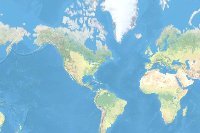

In [9]:
import pandas as pd
# Item Added From Toolbar
# Title: SanGIS Census Tracts 2020 | Type: Feature Service | Owner: jil386_UCSDOnline
tract_buffer = gis.content.get("9ba4c990d5424cf1b07c99aee139444f").layers[0]
# Item Added From Toolbar
# Title: Household Size by Vehicles Available | Type: Feature Service | Owner: jil386_UCSDOnline
vehicle_table_item = gis.content.get("171c96c415b647af95ae783edf7d8d57")
vehicle_table = vehicle_table_item.tables[0]
vehicle_table_item

In [12]:
vehicle_data = vehicle_table.query().sdf  # 'sdf' is a Spatial DataFrame, similar to a Pandas DataFrame but with spatial capabilities
print(vehicle_data.head(), vehicle_data.shape)  # Print the first few records
vehicle_data = vehicle_data[['GEO_ID', 'B08201_002E', 'B08201_003E']]
vehicle_data = vehicle_data[vehicle_data['GEO_ID']!='0500000US06073']
print(vehicle_data.head(), vehicle_data.shape)  # Print the first few records

                 GEO_ID                                             NAME  \
0        0500000US06073                     San Diego County, California   
1  1400000US06073000100     Census Tract 1; San Diego County; California   
2  1400000US06073000201  Census Tract 2.01; San Diego County; California   
3  1400000US06073000202  Census Tract 2.02; San Diego County; California   
4  1400000US06073000301  Census Tract 3.01; San Diego County; California   

   B08201_001E  B08201_001M  B08201_002E  B08201_002M  B08201_003E  \
0      1149157         2527        62302         2124       341718   
1         1156          123           40           39          258   
2         1218          122          156           68          547   
3         2231          206           74           56         1258   
4         1386          189           96           69          794   

   B08201_003M  B08201_004E  B08201_004M  ...  B08201_026M  B08201_027E  \
0         4655       460664         5082  ...  

In [13]:
def convert_geo_id_to_ctblockgro(geo_id):
    # Example conversion logic
    converted_value = geo_id[-6:]  # This is a placeholder, adjust the logic as needed
    return int(converted_value)
vehicle_data['Converted_GEO_ID'] = vehicle_data['GEO_ID'].apply(convert_geo_id_to_ctblockgro)
print(vehicle_data.head())  # Print the first few records

                 GEO_ID  B08201_002E  B08201_003E  Converted_GEO_ID
1  1400000US06073000100           40          258               100
2  1400000US06073000201          156          547               201
3  1400000US06073000202           74         1258               202
4  1400000US06073000301           96          794               301
5  1400000US06073000302           57          979               302


In [14]:
tract_data = tract_buffer.query().sdf
tract_data.drop(columns=['GEO_ID', 'B08201_002E', 'B08201_003E'], inplace=True, errors='ignore')
# Merge based on the converted GEO_ID and CTBLOCKGRO
merged_data = pd.merge(left=tract_data, right=vehicle_data, left_on='TRACT', right_on='Converted_GEO_ID', how='left')
tract_data.shape, vehicle_data.shape, merged_data.shape

((736, 6), (737, 4), (736, 10))

In [15]:
merged_data.drop(columns=['Converted_GEO_ID', 'ObjectId'], inplace=True, errors='ignore')
print(merged_data.head())  # Print the first few records

   FID  TRACT     Shape__Area  Shape__Length  MileRange  \
0    1  100.0  2121345.296875    6727.613729        0.5   
1    2  201.0       1150934.5    4569.484378        1.0   
2    3  202.0  1851316.988281    6622.402917        0.5   
3    4  301.0   569555.585938    4067.994138        1.0   
4    5  302.0   704461.050781    3734.022818        1.0   

                                               SHAPE                GEO_ID  \
0  {"rings": [[[-13045373.0233012, 3863378.862094...  1400000US06073000100   
1  {"rings": [[[-13043262.6470301, 3863203.721765...  1400000US06073000201   
2  {"rings": [[[-13043843.7347012, 3862151.418236...  1400000US06073000202   
3  {"rings": [[[-13042934.4769671, 3862033.486759...  1400000US06073000301   
4  {"rings": [[[-13041777.5333101, 3861955.792880...  1400000US06073000302   

   B08201_002E  B08201_003E  
0           40          258  
1          156          547  
2           74         1258  
3           96          794  
4           57          97

In [16]:
from arcgis.features import Feature, FeatureSet

# Initialize an empty list to hold the features
features_to_update = []

# Iterate over the DataFrame rows
for index, row in merged_data.iterrows():
    # Create a Feature object for each row
    feature = Feature(
        geometry=row['SHAPE'],  # Assuming 'SHAPE' is a column with geometry information
        attributes=row.drop('SHAPE').to_dict()  # Exclude the 'SHAPE' column from attributes
    )
    features_to_update.append(feature)

# Create a FeatureSet from the list of features
feature_set = FeatureSet(features=features_to_update)
# Perform the update
update_result = tract_buffer.edit_features(updates=feature_set.features)
update_result

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': True},
  {'objectId': 2, 'uniqueId': 2, 'globalId': None, 'success': True},
  {'objectId': 3, 'uniqueId': 3, 'globalId': None, 'success': True},
  {'objectId': 4, 'uniqueId': 4, 'globalId': None, 'success': True},
  {'objectId': 5, 'uniqueId': 5, 'globalId': None, 'success': True},
  {'objectId': 6, 'uniqueId': 6, 'globalId': None, 'success': True},
  {'objectId': 7, 'uniqueId': 7, 'globalId': None, 'success': True},
  {'objectId': 8, 'uniqueId': 8, 'globalId': None, 'success': True},
  {'objectId': 9, 'uniqueId': 9, 'globalId': None, 'success': True},
  {'objectId': 10, 'uniqueId': 10, 'globalId': None, 'success': True},
  {'objectId': 11, 'uniqueId': 11, 'globalId': None, 'success': True},
  {'objectId': 12, 'uniqueId': 12, 'globalId': None, 'success': True},
  {'objectId': 13, 'uniqueId': 13, 'globalId': None, 'success': True},
  {'objectId': 14, 'uniqueId': 14, 'globalId': Non

## Metrics Layer
### Import data

In [2]:
# Item Added From Toolbar
# Title: BlockGroups | Type: Feature Service | Owner: jil386_UCSDOnline
polygon_layer = gis.content.get("4a172955dd3141e08e6cc597add25ffb").layers[0]
# Item Added From Toolbar
# Title: Metrics by BlockGroups | Type: Feature Service | Owner: jil386_UCSDOnline
target_item = gis.content.get("28b1e64d59b642039f428cd96335a212")

In [3]:
from arcgis.features import FeatureLayerCollection
from arcgis.geometry import Geometry, areas_and_lengths, AreaUnits, LengthUnits
from tqdm import tqdm

features = polygon_layer.query()  # Fetch all features; adjust query as necessary
new_features = []
for feature in tqdm(features):
    geom = Geometry(feature.geometry)
    # Calculate area in acres
    area_result = areas_and_lengths(
        polygons=[geom],
        length_unit=LengthUnits.FOOT,  # Length unit, required but not used directly in area calculation
        area_unit=AreaUnits.ACRES,  # Specify area unit
        calculation_type="geodesic",  # Use geodesic for accurate global measurements
        spatial_ref=feature.geometry['spatialReference']['wkid'],  # Use spatial reference of the geometry
        gis=gis
    )
    area_acres = area_result['areas'][0]
    
    # Create new feature data assuming you have an 'Area_Acres' field
    new_attributes = feature.attributes.copy()
    new_attributes['area'] = area_acres
    new_features.append({"attributes": new_attributes, "geometry": feature.geometry})

print('Done')

 25%|██▍       | 509/2057 [03:40<11:11,  2.30it/s]


KeyboardInterrupt: 

In [ ]:
print(len(new_features), len(features))
print(new_features[0]['attributes'].keys())

In [ ]:
for feature in new_features:
    for key in ['B17101_001E', 'B17101_001M', 'B17101_002E', 'B17101_002M', 'B17101_003E', 'B17101_003M', 'B11007_002E', 'B25070_010E']:
        feature['attributes'].pop(key)
print(new_features[0])

In [ ]:
empty_layer = target_item.layers[0]  # Adjust index based on the layer you need
add_result = empty_layer.edit_features(adds=new_features)
print(add_result)

### Calculate density

In [24]:
import pandas as pd
# Item Added From Toolbar
# Title: SanGIS Census Tracts 2020 | Type: Feature Service | Owner: jil386_UCSDOnline
tract_buffer = gis.content.get("9ba4c990d5424cf1b07c99aee139444f").layers[0]
# Item Added From Toolbar
# Title: BlockGroups with Buffer | Type: Feature Service | Owner: jil386_UCSDOnline
block_buffer = gis.content.get("4a172955dd3141e08e6cc597add25ffb").layers[0]

In [33]:
tract_data = tract_buffer.query().sdf
print(tract_data.columns)
block_data = block_buffer.query().sdf
print(block_data.columns)

Index(['FID', 'TRACT', 'Shape__Area', 'Shape__Length', 'B08201_002E',
       'B08201_003E', 'MileRange', 'GEO_ID', 'SHAPE'],
      dtype='object')
Index(['FID', 'CTBLOCKGRO', 'TRACT', 'BLOCKGROUP', 'Shape_STAr', 'Shape_STLe',
       'Shape__Area', 'Shape__Length', 'MileRange', 'GEO_ID', 'B17101_001E',
       'B17101_001M', 'B17101_002E', 'B17101_002M', 'B17101_003E',
       'B17101_003M', 'B11007_002E', 'B25070_010E', 'GlobalID', 'CreationDate',
       'Creator', 'EditDate', 'Editor', 'SHAPE'],
      dtype='object')


In [41]:
def calculate_tmp_area(buffer, df):
    df["area"] = 0
    features = buffer.query()  # Fetch all features; adjust query as necessary
    for feature in tqdm(features):
        geom = Geometry(feature.geometry)
#         print(feature.attributes)
        # Calculate area in acres
        area_result = areas_and_lengths(
            polygons=[geom],
            length_unit=LengthUnits.FOOT,  # Length unit, required but not used directly in area calculation
            area_unit=AreaUnits.ACRES,  # Specify area unit
            calculation_type="geodesic",  # Use geodesic for accurate global measurements
            spatial_ref=feature.geometry['spatialReference']['wkid'],  # Use spatial reference of the geometry
            gis=gis
        )
        area_acres = area_result['areas'][0]

        df.loc[df['FID'] == feature.attributes['FID'], 'area'] = area_acres
        
    print('Done')
    
calculate_tmp_area(tract_buffer, tract_data)
calculate_tmp_area(block_buffer, block_data)

100%|██████████| 736/736 [04:57<00:00,  2.48it/s]


Done


100%|██████████| 2057/2057 [13:53<00:00,  2.47it/s]

Done


In [47]:
tract_data["vehicle0"] = tract_data["B08201_002E"] / tract_data["area"]
tract_data["vehicle1"] = tract_data["B08201_003E"] / tract_data["area"]

block_data["rent"] = block_data["B25070_010E"] / block_data["area"]
block_data["senior"] = block_data["B11007_002E"] / block_data["area"]
block_data["poverty"] = block_data["B17101_002E"] / block_data["area"]
print(tract_data.columns, block_data.columns)

Index(['FID', 'TRACT', 'Shape__Area', 'Shape__Length', 'B08201_002E',
       'B08201_003E', 'MileRange', 'GEO_ID', 'SHAPE', 'area', 'vehicle0',
       'vehicle1'],
      dtype='object') Index(['FID', 'CTBLOCKGRO', 'TRACT', 'BLOCKGROUP', 'Shape_STAr', 'Shape_STLe',
       'Shape__Area', 'Shape__Length', 'MileRange', 'GEO_ID', 'B17101_001E',
       'B17101_001M', 'B17101_002E', 'B17101_002M', 'B17101_003E',
       'B17101_003M', 'B11007_002E', 'B25070_010E', 'GlobalID', 'CreationDate',
       'Creator', 'EditDate', 'Editor', 'SHAPE', 'area', 'rent', 'senior',
       'poverty'],
      dtype='object')


In [64]:
# Item Added From Toolbar
# Title: Metrics by BlockGroups | Type: Feature Service | Owner: jil386_UCSDOnline
empty_layer = gis.content.get("28b1e64d59b642039f428cd96335a212").layers[0]
empty_layer_df = empty_layer.query().sdf

In [87]:
empty_layer_df.drop(columns=['vehicle0', 'vehicle1', 'rent', 'senior', 'poverty'], inplace=True, errors='ignore')
tract_data_new = tract_data[['TRACT', 'vehicle0', 'vehicle1']]
block_data_new = block_data[['GEO_ID', 'rent', 'senior', 'poverty']]

# Merge
block_data_new = block_data_new.drop_duplicates(subset='GEO_ID')
empty_layer_df = empty_layer_df.drop_duplicates(subset='GEO_ID')

merged_df = pd.merge(left=empty_layer_df, right=block_data_new, on='GEO_ID', how='left')
merged_df = pd.merge(left=merged_df, right=tract_data_new, on='TRACT', how='left')
print(empty_layer_df.shape, tract_data_new.shape, block_data_new.shape, merged_df.shape)
print(merged_df.columns)

(2056, 17) (736, 3) (2056, 4) (2056, 22)
Index(['FID', 'CTBLOCKGRO', 'TRACT', 'BLOCKGROUP', 'Shape_STAr', 'Shape_STLe',
       'MileRange', 'GEO_ID', 'GlobalID', 'CreationDate', 'Creator',
       'EditDate', 'Editor', 'Shape__Area', 'Shape__Length', 'area', 'SHAPE',
       'rent', 'senior', 'poverty', 'vehicle0', 'vehicle1'],
      dtype='object')


In [88]:
merged_df.head()

,FID,CTBLOCKGRO,TRACT,BLOCKGROUP,Shape_STAr,Shape_STLe,MileRange,GEO_ID,GlobalID,CreationDate,...,Editor,Shape__Area,Shape__Length,area,SHAPE,rent,senior,poverty,vehicle0,vehicle1
0,1,1001,100,1,6612183.297,14926.27666,1.0,1500000US060730001001,9e7b01e9-2d09-4979-ba9e-263598819675,2024-05-03 20:17:52.525,...,jil386_UCSDOnline,870950.835938,5416.886362,151.793971,"{""rings"": [[[-13045373.0233012, 3863378.862094...",0.0,1.567915,0.2174,0.108187,0.697807
1,2,1002,100,2,9493350.65981,17138.306391,0.5,1500000US060730001002,79df95c5-412a-49f8-8405-8ce181e4a61f,2024-05-03 20:17:52.525,...,jil386_UCSDOnline,1250394.460938,6218.868332,217.935921,"{""rings"": [[[-13045284.5432958, 3863125.887768...",0.050474,1.518795,0.100947,0.108187,0.697807
2,3,2011,201,1,4886043.57328,12687.454265,1.0,1500000US060730002011,8ea045f5-188f-4d4c-a995-a5e53e905def,2024-05-03 20:17:52.525,...,jil386_UCSDOnline,643591.308594,4605.049168,112.167497,"{""rings"": [[[-13043262.6470301, 3863203.721765...",0.18722,1.043083,0.276372,0.777696,2.726921
3,4,2012,201,2,3851820.19274,8002.546044,1.0,1500000US060730002012,65e9999c-a986-4e54-999f-2e33ea6af8a3,2024-05-03 20:17:52.525,...,jil386_UCSDOnline,507343.191406,2905.047841,88.425075,"{""rings"": [[[-13043566.7718158, 3862919.524405...",1.119592,5.586651,1.82075,0.777696,2.726921
4,5,2021,202,1,4287464.86349,12084.228865,0.5,1500000US060730002021,f7cc2ab8-88e7-41b0-8500-9587522105d7,2024-05-03 20:17:52.525,...,jil386_UCSDOnline,564610.605469,4384.826942,98.42573,"{""rings"": [[[-13043560.4266324, 3862026.868731...",1.066794,1.84911,0.233679,0.229301,3.898115


In [96]:
updates = []

empty_layer_features = empty_layer.query()
for index, row in merged_df.iterrows():
    feature = empty_layer_features.features[index]
    # Update other features as usual
    for key in ['vehicle0', 'vehicle1', 'rent', 'senior', 'poverty']:
        feature.attributes[key] = row[key]
    updates.append(feature)

# Perform updates if there are any
if updates:
    update_result = empty_layer.edit_features(updates=updates)
    print("Update Result:", update_result)

KeyError: 'OBJECTID'

## Remove a unexpected row

In [104]:
# Item Added From Toolbar
# Title: Metrics by BlockGroups | Type: Feature Service | Owner: jil386_UCSDOnline
to_del_layer = gis.content.get("28b1e64d59b642039f428cd96335a212").layers[0]

In [105]:
if to_del_layer.query().features:
    last_feature = features.features[-1]  # Get the last feature
    object_id = last_feature.attributes['FID']  # Assuming 'OBJECTID' is the correct identifier

    # Delete the last feature using its OBJECTID
    delete_result = to_del_layer.edit_features(deletes=str(object_id))
    print(delete_result)
else:
    print("No features found to delete.")

{'addResults': [], 'updateResults': [], 'deleteResults': [{'objectId': 2057, 'uniqueId': 2057, 'globalId': None, 'success': True}]}


In [107]:
gis.content.get("28b1e64d59b642039f428cd96335a212").layers[0].query().sdf["GEO_ID"].duplicated().sum()

0

## Metrics Layer (Final)
### Import data

<Item title:"Microtransit Adoption Metrics" type:Feature Layer Collection owner:jil386_UCSDOnline>
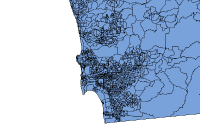

In [4]:
# Item Added From Toolbar
# Title: BlockGroups | Type: Feature Service | Owner: jil386_UCSDOnline
polygon_layer = gis.content.get("4a172955dd3141e08e6cc597add25ffb").layers[0]
# Item Added From Toolbar
# Title: Microtransit Adoption Metrics | Type: Feature Service | Owner: jil386_UCSDOnline
target_item = gis.content.get("d145b18b09a943e6b43fe820ef2114e6")
target_item

In [17]:
for layer in target_item.layers:
    # Delete all features in the layer using a 'where' clause
    delete_result = layer.delete_features(where="1=1")

In [7]:
from arcgis.features import FeatureLayerCollection
from arcgis.geometry import Geometry, areas_and_lengths, AreaUnits, LengthUnits
from tqdm import tqdm

features = polygon_layer.query()  # Fetch all features; adjust query as necessary
new_features = []
for feature in tqdm(features):
    geom = Geometry(feature.geometry)
    # Calculate area in acres
    area_result = areas_and_lengths(
        polygons=[geom],
        length_unit=LengthUnits.FOOT,  # Length unit, required but not used directly in area calculation
        area_unit=AreaUnits.ACRES,  # Specify area unit
        calculation_type="geodesic",  # Use geodesic for accurate global measurements
        spatial_ref=feature.geometry['spatialReference']['wkid'],  # Use spatial reference of the geometry
        gis=gis
    )
    area_acres = area_result['areas'][0]
    
    area_result = areas_and_lengths(
        polygons=[geom],
        length_unit=LengthUnits.FOOT,  # Length unit, required but not used directly in area calculation
        area_unit=AreaUnits.SQUAREMILES,  # Specify area unit
        calculation_type="geodesic",  # Use geodesic for accurate global measurements
        spatial_ref=feature.geometry['spatialReference']['wkid'],  # Use spatial reference of the geometry
        gis=gis
    )
    area_miles = area_result['areas'][0]
    
    area_result = areas_and_lengths(
        polygons=[geom],
        length_unit=LengthUnits.FOOT,  # Length unit, required but not used directly in area calculation
        area_unit=AreaUnits.SQUAREMETERS,  # Specify area unit
        calculation_type="geodesic",  # Use geodesic for accurate global measurements
        spatial_ref=feature.geometry['spatialReference']['wkid'],  # Use spatial reference of the geometry
        gis=gis
    )
    area_meters = area_result['areas'][0]
    
    # Create new feature data assuming you have an 'Area_Acres' field
    new_attributes = feature.attributes.copy()
    new_attributes['area_acres'] = area_acres
    new_attributes['area_miles'] = area_miles
    new_attributes['area_meters'] = area_meters
    new_features.append({"attributes": new_attributes, "geometry": feature.geometry})

print('Done')

100%|██████████| 2057/2057 [47:39<00:00,  1.39s/it]

Done


In [9]:
print(len(new_features), len(features))
print(new_features[0]['attributes'].keys())

2057 2057
dict_keys(['FID', 'CTBLOCKGRO', 'TRACT', 'BLOCKGROUP', 'Shape_STAr', 'Shape_STLe', 'Shape__Area', 'Shape__Length', 'MileRange', 'GEO_ID', 'B17101_001E', 'B17101_001M', 'B17101_002E', 'B17101_002M', 'B17101_003E', 'B17101_003M', 'B11007_002E', 'B25070_010E', 'GlobalID', 'CreationDate', 'Creator', 'EditDate', 'Editor', 'area_acres', 'area_miles', 'area_meters'])


In [10]:
for feature in new_features:
    for key in ['B17101_001E', 'B17101_001M', 'B17101_002E', 'B17101_002M', 'B17101_003E', 'B17101_003M', 'B11007_002E', 'B25070_010E']:
        feature['attributes'].pop(key)
print(new_features[0])

{'attributes': {'FID': 1, 'CTBLOCKGRO': 1001, 'TRACT': 100, 'BLOCKGROUP': 1, 'Shape_STAr': 6612183.297, 'Shape_STLe': 14926.2766604, 'Shape__Area': 870950.8359375, 'Shape__Length': 5416.88636172609, 'MileRange': 1, 'GEO_ID': '1500000US060730001001', 'GlobalID': 'e81f938e-bbd8-4db5-b625-9f8fdd97f464', 'CreationDate': 1712100018693, 'Creator': 'jil386_UCSDOnline', 'EditDate': 1712100018693, 'Editor': 'jil386_UCSDOnline', 'area_acres': 151.79397060140312, 'area_miles': 0.2371780790954616, 'area_meters': 614288.4048098851}, 'geometry': {'rings': [[[-13045373.0233012, 3863378.86209465], [-13045355.9079129, 3863368.10235824], [-13045308.4017736, 3863368.88520414], [-13045231.5537595, 3863364.38870668], [-13045232.8165038, 3863339.37504354], [-13045186.9159932, 3863334.63759262], [-13045152.2309237, 3863308.09117697], [-13045135.2005094, 3863306.78956733], [-13045122.2178076, 3863312.72796168], [-13045073.0064983, 3863276.06141522], [-13045044.5796018, 3863255.57966611], [-13044916.3134741, 3

In [18]:
empty_layer = target_item.layers[0]  # Adjust index based on the layer you need
add_result = empty_layer.edit_features(adds=new_features)
print(add_result)

{'addResults': [{'objectId': 2058, 'uniqueId': 2058, 'globalId': '2AC8F557-4B2F-4ECA-B6E1-694EFAE5CA7C', 'success': True}, {'objectId': 2059, 'uniqueId': 2059, 'globalId': '06186087-8B7D-48B3-8F98-1DAACA833ECA', 'success': True}, {'objectId': 2060, 'uniqueId': 2060, 'globalId': '6D082066-F37D-4829-9245-0CF5BEA385A0', 'success': True}, {'objectId': 2061, 'uniqueId': 2061, 'globalId': '89055AF7-5A4B-4673-834C-31B6333DCAF5', 'success': True}, {'objectId': 2062, 'uniqueId': 2062, 'globalId': '0766C1BE-8D94-4B15-9095-332A14FDF41F', 'success': True}, {'objectId': 2063, 'uniqueId': 2063, 'globalId': 'E9CC0258-E767-4F58-97FA-EC395F8B8EB2', 'success': True}, {'objectId': 2064, 'uniqueId': 2064, 'globalId': '097DE65B-9065-4CC0-92CA-A91E28F12909', 'success': True}, {'objectId': 2065, 'uniqueId': 2065, 'globalId': 'C16B17E9-4686-4E72-A6B2-C6BF6409AB7A', 'success': True}, {'objectId': 2066, 'uniqueId': 2066, 'globalId': 'A3BE6FEE-8A0D-4C27-99F6-4A5311FF33BE', 'success': True}, {'objectId': 2067, 'u

### Calculate density

In [24]:
import pandas as pd
# Item Added From Toolbar
# Title: SanGIS Census Tracts 2020 | Type: Feature Service | Owner: jil386_UCSDOnline
tract_buffer = gis.content.get("9ba4c990d5424cf1b07c99aee139444f").layers[0]
# Item Added From Toolbar
# Title: BlockGroups with Buffer | Type: Feature Service | Owner: jil386_UCSDOnline
block_buffer = gis.content.get("4a172955dd3141e08e6cc597add25ffb").layers[0]

In [25]:
tract_data = tract_buffer.query().sdf
print(tract_data.columns)
block_data = block_buffer.query().sdf
print(block_data.columns)

Index(['FID', 'TRACT', 'Shape__Area', 'Shape__Length', 'B08201_002E',
       'B08201_003E', 'MileRange', 'GEO_ID', 'SHAPE'],
      dtype='object')
Index(['FID', 'CTBLOCKGRO', 'TRACT', 'BLOCKGROUP', 'Shape_STAr', 'Shape_STLe',
       'Shape__Area', 'Shape__Length', 'MileRange', 'GEO_ID', 'B17101_001E',
       'B17101_001M', 'B17101_002E', 'B17101_002M', 'B17101_003E',
       'B17101_003M', 'B11007_002E', 'B25070_010E', 'GlobalID', 'CreationDate',
       'Creator', 'EditDate', 'Editor', 'SHAPE'],
      dtype='object')


In [27]:
def calculate_tmp_area(buffer, df):
    df["area"] = 0
    features = buffer.query()  # Fetch all features; adjust query as necessary
    for feature in tqdm(features):
        geom = Geometry(feature.geometry)
#         print(feature.attributes)
        # Calculate area in acres
        area_result = areas_and_lengths(
            polygons=[geom],
            length_unit=LengthUnits.FOOT,  # Length unit, required but not used directly in area calculation
            area_unit=AreaUnits.SQUAREMILES,  # Specify area unit
            calculation_type="geodesic",  # Use geodesic for accurate global measurements
            spatial_ref=feature.geometry['spatialReference']['wkid'],  # Use spatial reference of the geometry
            gis=gis
        )
        area_acres = area_result['areas'][0]

        df.loc[df['FID'] == feature.attributes['FID'], 'area'] = area_acres
        
    print('Done')
    
calculate_tmp_area(tract_buffer, tract_data)
calculate_tmp_area(block_buffer, block_data)

100%|██████████| 736/736 [05:35<00:00,  2.19it/s]


Done


100%|██████████| 2057/2057 [15:05<00:00,  2.27it/s]

Done


In [28]:
tract_data["vehicle0"] = tract_data["B08201_002E"] / tract_data["area"]
tract_data["vehicle1"] = tract_data["B08201_003E"] / tract_data["area"]

block_data["rent"] = block_data["B25070_010E"] / block_data["area"]
block_data["senior"] = block_data["B11007_002E"] / block_data["area"]
block_data["poverty"] = block_data["B17101_002E"] / block_data["area"]
print(tract_data.columns, block_data.columns)

Index(['FID', 'TRACT', 'Shape__Area', 'Shape__Length', 'B08201_002E',
       'B08201_003E', 'MileRange', 'GEO_ID', 'SHAPE', 'area', 'vehicle0',
       'vehicle1'],
      dtype='object') Index(['FID', 'CTBLOCKGRO', 'TRACT', 'BLOCKGROUP', 'Shape_STAr', 'Shape_STLe',
       'Shape__Area', 'Shape__Length', 'MileRange', 'GEO_ID', 'B17101_001E',
       'B17101_001M', 'B17101_002E', 'B17101_002M', 'B17101_003E',
       'B17101_003M', 'B11007_002E', 'B25070_010E', 'GlobalID', 'CreationDate',
       'Creator', 'EditDate', 'Editor', 'SHAPE', 'area', 'rent', 'senior',
       'poverty'],
      dtype='object')


In [31]:
# Item Added From Toolbar
# Title: Microtransit Adoption Metrics | Type: Feature Service | Owner: jil386_UCSDOnline
empty_layer = gis.content.get("d145b18b09a943e6b43fe820ef2114e6").layers[0]
empty_layer_df = empty_layer.query().sdf
empty_layer_df.columns

Index(['FID', 'CTBLOCKGRO', 'TRACT', 'BLOCKGROUP', 'Shape_STAr', 'Shape_STLe',
       'Shape__Area', 'Shape__Length', 'MileRange', 'GEO_ID', 'GlobalID',
       'CreationDate', 'Creator', 'EditDate', 'Editor', 'vehicle0', 'vehicle1',
       'vehicle', 'rent', 'senior', 'poverty', 'area_acres', 'area_miles',
       'area_meters', 'vehicle0_total', 'vehicle1_total', 'vehicle_total',
       'rent_total', 'senior_total', 'poverty_total', 'SHAPE'],
      dtype='object')

In [32]:
empty_layer_df.drop(columns=['vehicle0', 'vehicle1',
       'vehicle', 'rent', 'senior', 'poverty', 'area_acres', 'area_miles',
       'area_meters', 'vehicle0_total', 'vehicle1_total', 'vehicle_total',
       'rent_total', 'senior_total', 'poverty_total'], inplace=True, errors='ignore')
tract_data_new = tract_data[['TRACT', 'vehicle0', 'vehicle1']]
block_data_new = block_data[['GEO_ID', 'rent', 'senior', 'poverty']]

# Merge
block_data_new = block_data_new.drop_duplicates(subset='GEO_ID')
empty_layer_df = empty_layer_df.drop_duplicates(subset='GEO_ID')

merged_df = pd.merge(left=empty_layer_df, right=block_data_new, on='GEO_ID', how='left')
merged_df = pd.merge(left=merged_df, right=tract_data_new, on='TRACT', how='left')
merged_df['vehicle'] = merged_df['vehicle0'] + merged_df['vehicle1']
print(empty_layer_df.shape, tract_data_new.shape, block_data_new.shape, merged_df.shape)
print(merged_df.columns)

(2056, 16) (736, 3) (2056, 4) (2056, 22)
Index(['FID', 'CTBLOCKGRO', 'TRACT', 'BLOCKGROUP', 'Shape_STAr', 'Shape_STLe',
       'Shape__Area', 'Shape__Length', 'MileRange', 'GEO_ID', 'GlobalID',
       'CreationDate', 'Creator', 'EditDate', 'Editor', 'SHAPE', 'rent',
       'senior', 'poverty', 'vehicle0', 'vehicle1', 'vehicle'],
      dtype='object')


In [33]:
merged_df

,FID,CTBLOCKGRO,TRACT,BLOCKGROUP,Shape_STAr,Shape_STLe,Shape__Area,Shape__Length,MileRange,GEO_ID,...,Creator,EditDate,Editor,SHAPE,rent,senior,poverty,vehicle0,vehicle1,vehicle
0,2058,1001,100,1,6612183.297,14926.27666,870950.835938,5416.886362,1.0,1500000US060730001001,...,jil386_UCSDOnline,2024-06-19 08:45:56.625999,jil386_UCSDOnline,"{""rings"": [[[-13045373.0233012, 3863378.862094...",0.0,1003.465417,139.135961,69.239736,446.596295,515.836031
1,2059,1002,100,2,9493350.65981,17138.306391,1250394.460938,6218.868332,0.5,1500000US060730001002,...,jil386_UCSDOnline,2024-06-19 08:45:56.625999,jil386_UCSDOnline,"{""rings"": [[[-13045284.5432958, 3863125.887768...",32.303073,972.028836,64.606146,69.239736,446.596295,515.836031
2,2060,2011,201,1,4886043.57328,12687.454265,643591.308594,4605.049168,1.0,1500000US060730002011,...,jil386_UCSDOnline,2024-06-19 08:45:56.625999,jil386_UCSDOnline,"{""rings"": [[[-13043262.6470301, 3863203.721765...",119.820807,667.573068,176.878334,497.725309,1745.229129,2242.954438
3,2061,2012,201,2,3851820.19274,8002.546044,507343.191406,2905.047841,1.0,1500000US060730002012,...,jil386_UCSDOnline,2024-06-19 08:45:56.625999,jil386_UCSDOnline,"{""rings"": [[[-13043566.7718158, 3862919.524405...",716.53883,3575.456383,1165.280319,497.725309,1745.229129,2242.954438
4,2062,2021,202,1,4287464.86349,12084.228865,564610.605469,4384.826942,0.5,1500000US060730002021,...,jil386_UCSDOnline,2024-06-19 08:45:56.625999,jil386_UCSDOnline,"{""rings"": [[[-13043560.4266324, 3862026.868731...",682.748305,1183.430395,149.554391,146.752582,2494.793892,2641.546474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,4110,221012,22101,2,95635164.5366,51722.922164,12704852.972656,18840.592538,10.0,1500000US060730221012,...,jil386_UCSDOnline,2024-06-19 08:45:56.625999,jil386_UCSDOnline,"{""rings"": [[[-13054996.8396513, 3913819.081073...",3.206319,56.547802,0.0,0.0,70.52568,70.52568
2052,4111,221021,22102,1,15678264.9723,17548.573019,2081714.761719,6393.074768,10.0,1500000US060730221021,...,jil386_UCSDOnline,2024-06-19 08:45:56.625999,jil386_UCSDOnline,"{""rings"": [[[-13055545.9784807, 3908498.158755...",44.450324,567.18613,183.135333,10.127266,428.720913,438.848178
2053,4112,221022,22102,2,13833095.6274,16087.833087,1836718.660156,5863.177498,10.0,1500000US060730221022,...,jil386_UCSDOnline,2024-06-19 08:45:56.625999,jil386_UCSDOnline,"{""rings"": [[[-13054719.9878051, 3910455.159724...",239.80625,225.7,149.123214,10.127266,428.720913,438.848178
2054,4113,221023,22102,3,13818523.82,17097.904854,1835194.945312,6230.167184,10.0,1500000US060730221023,...,jil386_UCSDOnline,2024-06-19 08:45:56.625999,jil386_UCSDOnline,"{""rings"": [[[-13056037.1202188, 3910447.716884...",0.0,143.228366,627.380591,10.127266,428.720913,438.848178


In [43]:
updates = []

empty_layer_features = empty_layer.query()
for index, row in merged_df.iterrows():
    feature = empty_layer_features.features[index]
    # Update other features as usual
    for key in ['rent', 'senior', 'poverty', 'vehicle0', 'vehicle1', 'vehicle']:
        feature.attributes[key] = row[key]
        feature.attributes['{}_total'.format(key)] = row[key] * feature.attributes["area_miles"]
    updates.append(feature)

# Perform updates if there are any
if updates:
    update_result = empty_layer.edit_features(updates=updates)
    print("Update Result:", update_result)

Update Result: {'addResults': [], 'updateResults': [{'objectId': 2058, 'uniqueId': 2058, 'globalId': '2ac8f557-4b2f-4eca-b6e1-694efae5ca7c', 'success': True}, {'objectId': 2059, 'uniqueId': 2059, 'globalId': '06186087-8b7d-48b3-8f98-1daaca833eca', 'success': True}, {'objectId': 2060, 'uniqueId': 2060, 'globalId': '6d082066-f37d-4829-9245-0cf5bea385a0', 'success': True}, {'objectId': 2061, 'uniqueId': 2061, 'globalId': '89055af7-5a4b-4673-834c-31b6333dcaf5', 'success': True}, {'objectId': 2062, 'uniqueId': 2062, 'globalId': '0766c1be-8d94-4b15-9095-332a14fdf41f', 'success': True}, {'objectId': 2063, 'uniqueId': 2063, 'globalId': 'e9cc0258-e767-4f58-97fa-ec395f8b8eb2', 'success': True}, {'objectId': 2064, 'uniqueId': 2064, 'globalId': '097de65b-9065-4cc0-92ca-a91e28f12909', 'success': True}, {'objectId': 2065, 'uniqueId': 2065, 'globalId': 'c16b17e9-4686-4e72-a6b2-c6bf6409ab7a', 'success': True}, {'objectId': 2066, 'uniqueId': 2066, 'globalId': 'a3be6fee-8a0d-4c27-99f6-4a5311ff33be', 'su

## Remove a unexpected row

In [19]:
# Item Added From Toolbar
# Title: Microtransit Adoption Metrics | Type: Feature Service | Owner: jil386_UCSDOnline
to_del_layer = gis.content.get("d145b18b09a943e6b43fe820ef2114e6").layers[0]

In [22]:
if to_del_layer.query().features:
#     last_feature = features.features[-1]  # Get the last feature
#     object_id = last_feature.attributes['FID']  # Assuming 'OBJECTID' is the correct identifier

    # Delete the last feature using its OBJECTID
    delete_result = to_del_layer.edit_features(deletes=str(2067))
    print(delete_result)
else:
    print("No features found to delete.")

{'addResults': [], 'updateResults': [], 'deleteResults': [{'objectId': 2067, 'uniqueId': 2067, 'globalId': None, 'success': True}]}


In [23]:
gis.content.get("28b1e64d59b642039f428cd96335a212").layers[0].query().sdf["GEO_ID"].duplicated().sum()

0